# Simple Linear Regression on tips

### Importing Necessary Libraries

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Understanding the Dataset

In [202]:
dataset_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

df = pd.read_csv(dataset_url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Dataset Columns

In [203]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

We can understand that the dependant variable (target variable) is tip, while the independant variables (features) are total_bill, sex, smoker, day, time and size in the tips dataset.

##### Statistical Analysis of the Dataset

In [204]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


##### Shape of the Original Dataset

In [205]:
df.shape

(244, 7)

##### Datatypes of each column

In [206]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### Handling Missing Values and Outliers in the Dataset

In [207]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

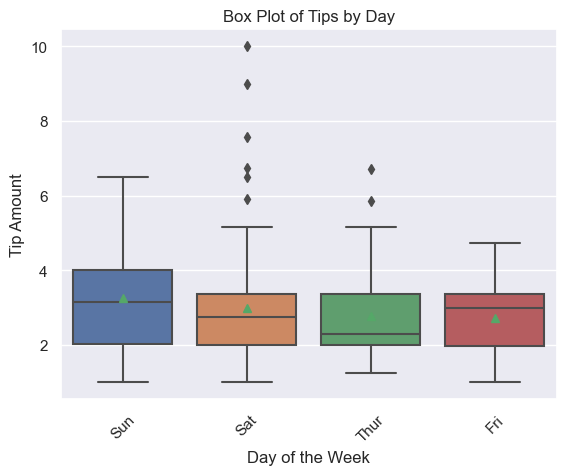

In [208]:
sns.boxplot(
    x = "day",  
    y = "tip",
    showmeans=True,  
    data=df
)

plt.title("Box Plot of Tips by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Tip Amount")
plt.xticks(rotation=45)  

plt.show()

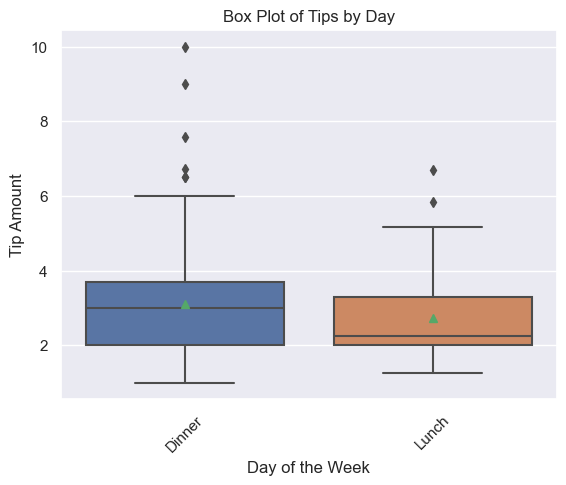

In [209]:
sns.boxplot(
    x = "time",  
    y = "tip",
    showmeans=True,  
    data=df
)

plt.title("Box Plot of Tips by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Tip Amount")
plt.xticks(rotation=45)  

plt.show()

As seen above, there are no missing values in our dataset, and there are not any extreme outliers present in our dataset that can negatively affect our model, as we can visualize from the boxplots.

# 2. Data Visualization

##### Scatter Plot of tips dataset using seaborn

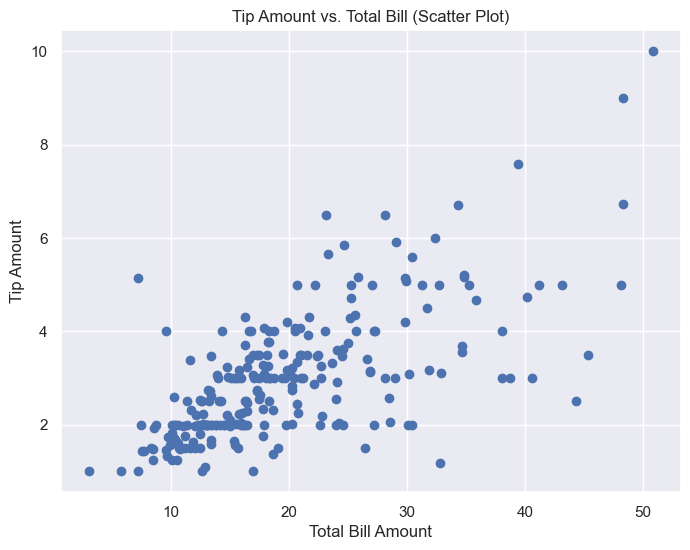

In [210]:
plt.figure(figsize=(8, 6)) 
plt.scatter(x='total_bill', y='tip', data=df)

plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.title('Tip Amount vs. Total Bill (Scatter Plot)')

plt.grid(True)

plt.show()

The above scatter plot show the relation between an independant variable (total_bill) and the dependant/target variable (tip). By analyzing it we can understand how total bill can affect the tip paid by the customer. From the above visualtization we can following patterns in the dataset:

-  The general trend of the data points shows a positive correlation between tip amount and total bill amount. 
-  The data points are scattered around the upward trend, indicating that the relationship is not perfectly linear etc.

##### Histogram Plot

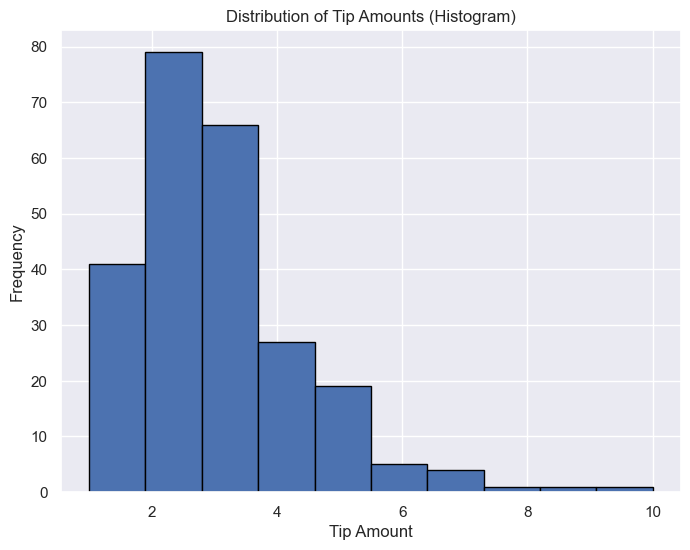

In [211]:
plt.figure(figsize=(8, 6))
plt.hist(df['tip'], bins=10, edgecolor='black') 

plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Amounts (Histogram)')

plt.show()

By analyzing the above histogram, we can understand the pattern for frequency of the tip amounts paid by the customer.

##### Dot Plot of tips dataset using seaborn

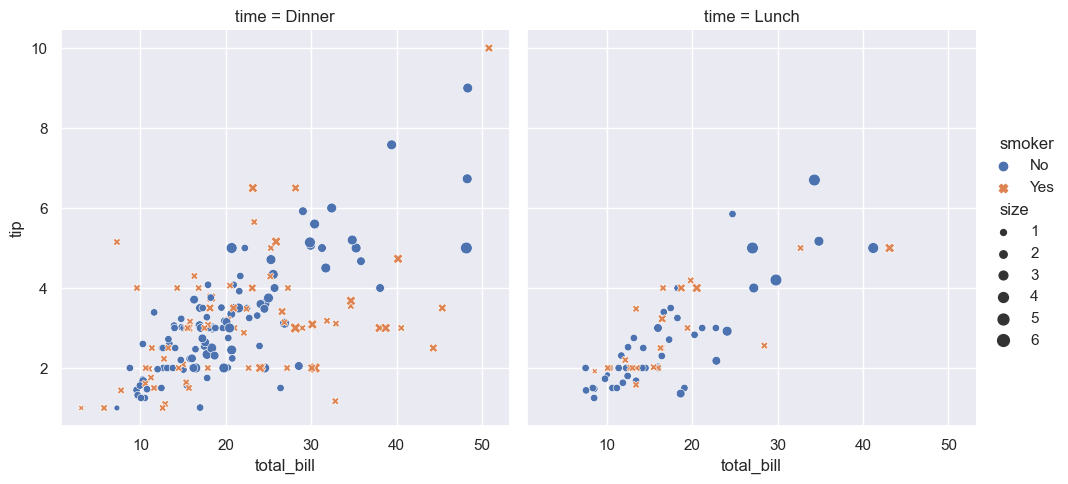

In [212]:
sns.set_theme()
sns.relplot (data=df,
             x="total_bill",
             y="tip",
             col="time",
             hue="smoker",
             style="smoker",
             size="size",
            )

The above visualization is for the dotplot, where we can find many patterns or trends for this dataset. For example, we can infer from this visualization, that there are more customers at the time of dinner as well as higher amount of bills and tips. Similarly we can also identify the size of the customers and whether they are smoker or not.

# 3. Model Building

##### Encoding Categorical Columns

In [213]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [214]:
df['total_bill'] = df['total_bill'].astype(int)
df['tip'] = df['tip'].astype(int)

le = LabelEncoder()

for col in df:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

##### Saving all the independant features in X, while the target column in y

In [215]:
X = df.drop('tip', axis=1).values
y = df['tip'].values 

##### Splitting the Dataset into Training and Testing Sets (Performing 80/20 Split)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Training the model

In [217]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Model Evaluation

In [218]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7838246721480256
R-squared: 0.474605517077775


### Comparison of Actual Values with the Predicted Values  

In [219]:
nf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
nf

,Actual,Predicted
0,3,2.586671
1,2,1.581819
2,2,3.589026
3,5,3.563165
4,2,2.033531
5,2,2.338286
6,2,3.445388
7,2,2.029561
8,3,2.146192
9,3,2.089574


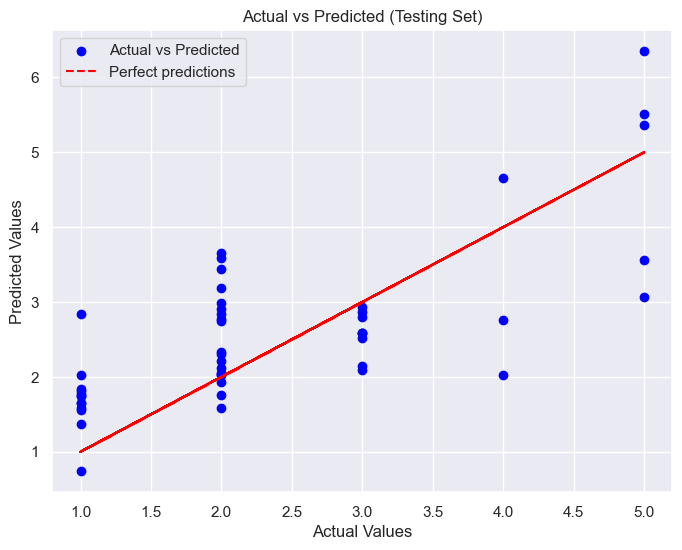

In [220]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect predictions')  
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()